In [2]:
#Following libraries will be used
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Import covid-19 data
covid19_dataset_csv = pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")
covid19_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [5]:
#Check the shape of data
covid19_dataset_csv.shape

(266, 104)

In [6]:
#Delete columns that are not need
covid19_dataset = covid19_dataset_csv.drop(['Lat','Long'],axis=1)

In [7]:
covid19_dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
#Aggregate Covid-19 data by country
covid19_dataset_aggregated = covid19_dataset.groupby("Country/Region").sum()

In [13]:
covid19_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [11]:
#Check the shape again
covid19_dataset_aggregated.shape

(187, 100)

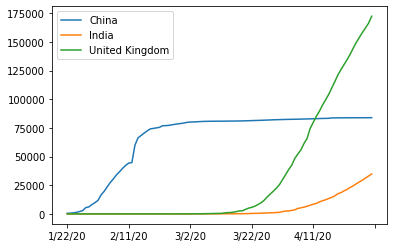

In [17]:
#Visualize this data
covid19_dataset_aggregated.loc["China"].plot()
covid19_dataset_aggregated.loc["India"].plot()
covid19_dataset_aggregated.loc["United Kingdom"].plot()
plt.legend()

<AxesSubplot:>

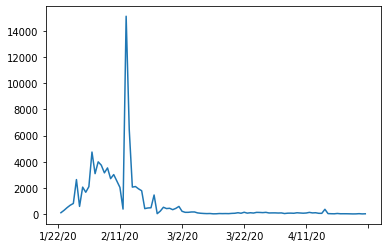

In [15]:
#Calculating first derivative gives change in rate of infection
covid19_dataset_aggregated.loc["China"].diff().plot()

In [16]:
#Use maximum infection rate as the key measure
covid19_dataset_aggregated.loc["China"].diff().max()

15136.0

In [29]:
#Calculate maximum infection rate for all countries
countries = list(covid19_dataset_aggregated.index)
max_infection_rate = []
for country in countries:
    max_infection_rate.append(covid19_dataset_aggregated.loc[country].diff().max())
covid19_dataset_aggregated["Maximum infection rate"] =  max_infection_rate

In [30]:
#Create new dataset with only required measure
covid19_data = pd.DataFrame(covid19_dataset_aggregated["Maximum infection rate"])

In [31]:
covid19_data.head()

,Maximum infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [21]:
#Import world happiness report data
happiness_data_csv = pd.read_csv("Datasets/worldwide_happiness_report.csv")

In [22]:
happiness_data_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [24]:
#Remove columns that are not needed
drop_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]
happiness_dataset = happiness_data_csv.drop(drop_cols,1)

In [25]:
happiness_dataset.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [26]:
#Change the index to Country
happiness_dataset.set_index("Country or region",inplace=True)

In [27]:
happiness_dataset.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [32]:
#Join (Inner Join) the covid-19 dataset and world hapinness report dataset
data = covid19_data.join(happiness_dataset,how="inner")
data.head()

,Maximum infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [34]:
#Measure correlation between attributes
data.corr()

,Maximum infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Maximum infection rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Maximum infection rate'>

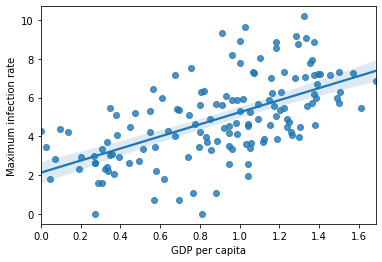

In [39]:
#Visualize the findings
x = data["GDP per capita"]
y = data["Maximum infection rate"]
sns.regplot(x,np.log(y))

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Maximum infection rate'>

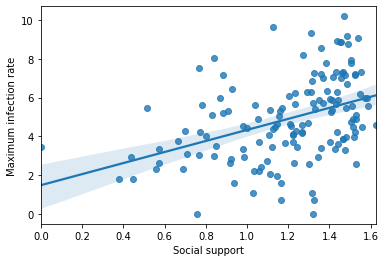

In [41]:
x1 = data["Social support"]
sns.regplot(x1,np.log(y))

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Maximum infection rate'>

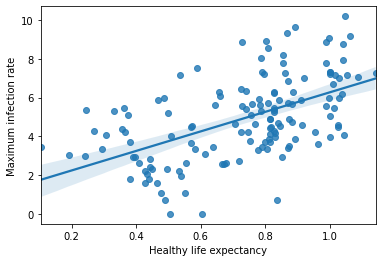

In [42]:
x2 = data["Healthy life expectancy"]
sns.regplot(x2,np.log(y))

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Maximum infection rate'>

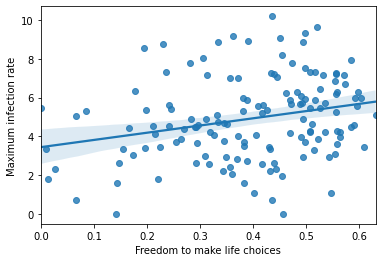

In [43]:
x3 = data["Freedom to make life choices"]
sns.regplot(x3,np.log(y))

In [44]:
#finish